### Introduction to Convolutional Neural Network and Computer Vision with tensorflow 

 # get the data 

 

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-06-27 05:44:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 108.177.98.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   109MB/s    in 1.0s    

2021-06-27 05:44:24 (109 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## inspect the data (becoming one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

for dirpath, dirname, filenames in os.walk('pizza_steak'):
  print(f"there are {len(dirname)} directories and {len(filenames)} images in '{dirpath}'. ")


there are 2 directories and 1 images in 'pizza_steak'. 
there are 2 directories and 1 images in 'pizza_steak/train'. 
there are 0 directories and 750 images in 'pizza_steak/train/steak'. 
there are 0 directories and 750 images in 'pizza_steak/train/pizza'. 
there are 2 directories and 1 images in 'pizza_steak/test'. 
there are 0 directories and 250 images in 'pizza_steak/test/steak'. 
there are 0 directories and 250 images in 'pizza_steak/test/pizza'. 


# to visualize our images, first lets get the class name

In [ ]:
# get the class name  
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')

class_name =  np.array(sorted([item.name for item in data_dir.glob("*")]))
class_name = class_name[1:]
print(class_name)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def image_view(target_dir, target_class):

  target_file = target_dir + target_class

# get random image path
  random_image = random.sample(os.listdir(target_file), 1)

  img = mpimg.imread(target_file + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape}") 

  return img

Image shape: (512, 512, 3)


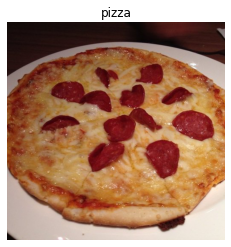

In [ ]:
img = image_view(target_dir='pizza_steak/train/',
           target_class = 'pizza')

In [ ]:
# the images we've imported and plotted are actually gaint arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 17,   9,   7],
        [ 17,   9,   7],
        [ 17,   9,   7],
        ...,
        [ 25,  11,  10],
        [ 26,  12,  11],
        [ 28,  14,  13]],

       [[ 18,  10,   8],
        [ 18,  10,   8],
        [ 18,  10,   8],
        ...,
        [ 31,  15,  15],
        [ 32,  16,  16],
        [ 33,  19,  18]],

       [[ 18,  10,   8],
        [ 18,  10,   8],
        [ 18,  10,   8],
        ...,
        [ 35,  20,  17],
        [ 36,  21,  18],
        [ 37,  22,  19]],

       ...,

       [[ 17,   8,   9],
        [ 17,   8,   9],
        [ 17,   8,   9],
        ...,
        [244, 238, 224],
        [244, 238, 224],
        [245, 239, 225]],

       [[ 17,   7,   6],
        [ 17,   7,   6],
        [ 16,   8,   6],
        ...,
        [243, 237, 223],
        [244, 238, 224],
        [244, 238, 224]],

       [[ 15,   5,   4],
        [ 16,   6,   5],
        [ 15,   7,   5],
        ...,
        [241, 235, 22

In [ ]:
# get all the pixel values between 0 and 1

img/255.

array([[[0.09019608, 0.01176471, 0.00784314],
        [0.09411765, 0.01568627, 0.01176471],
        [0.10196078, 0.01960784, 0.01568627],
        ...,
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        [0.01176471, 0.00392157, 0.01568627]],

       [[0.08235294, 0.01176471, 0.00392157],
        [0.09803922, 0.01960784, 0.01568627],
        [0.10980392, 0.02745098, 0.02352941],
        ...,
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        [0.01176471, 0.00392157, 0.01568627]],

       [[0.07843137, 0.00784314, 0.        ],
        [0.09411765, 0.02352941, 0.01568627],
        [0.10980392, 0.03137255, 0.02745098],
        ...,
        [0.00784314, 0.        , 0.01176471],
        [0.01176471, 0.00392157, 0.01568627],
        [0.01176471, 0.00392157, 0.01568627]],

       ...,

       [[0.01568627, 0.01176471, 0.03529412],
        [0.01176471, 0.00784314, 0.03137255],
        [0.01176471, 0

# An end-to-end examples
Lets builds a convolutional nueral network to find patterns in our images, more specifically

1. load our images
2. pre-process our images
3. Build our CNN to find patterns in our images 
4. compile our CNN
5. fit the CNN to our trainning data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

#preprocess data scaling/normalization
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#set up the dir
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

#import data from dir and turn into batches
train_data  = train_datagen.flow_from_directory(directory = train_dir,
                                                batch_size = 32,
                                                target_size = (224,224),
                                                class_mode = 'binary',
                                                seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42)

# Build a CNN model (same as TINY VGG on the cnn)

model_1 = tf.keras.Sequential([
          tf.keras.layers.Conv2D(filters = 10, 
                                kernel_size = 3,
                                activation = 'relu',
                                input_shape = (224,224,3)),
          tf.keras.layers.Conv2D(10,3,activation = 'relu'),
          tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding = 'valid'),
          tf.keras.layers.Conv2D(10,3,activation='relu'),
          tf.keras.layers.Conv2D(10,3,activation='relu'),
          tf.keras.layers.MaxPool2D(2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1, activation='sigmoid')

])

# compile model
model_1.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 199ms/step - loss: 0.5340 - accuracy: 0.7233 - val_loss: 0.3861 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4102 - accuracy: 0.8167 - val_loss: 0.3419 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3971 - accuracy: 0.8427 - val_loss: 0.3245 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3810 - accuracy: 0.8300 - val_loss: 0.3029 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3149 - accuracy: 0.8713 - val_loss: 0.3005 - val_accuracy: 0.8820


In [ ]:
len(train_data)

47

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# create a model as we build before for classification problems and fit the pizza and steak image and see whats happen's
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (224,224,3)),
          tf.keras.layers.Dense(4, activation='relu'),
          tf.keras.layers.Dense(4, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_2.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 0.9921 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


### Despite having 20x more paramater than cnn model,
#### model_2 performs terribly...lets try to improve it

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (224,224,3)),
          tf.keras.layers.Dense(100, activation='relu'),
          tf.keras.layers.Dense(100, activation='relu'),
          tf.keras.layers.Dense(100, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_3.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 3.0087 - accuracy: 0.6380 - val_loss: 0.6877 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.5677 - accuracy: 0.7407 - val_loss: 0.4748 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.8159 - accuracy: 0.7167 - val_loss: 1.4120 - val_accuracy: 0.6860
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.7598 - accuracy: 0.7207 - val_loss: 0.4674 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6024 - accuracy: 0.7527 - val_loss: 0.5043 - val_accuracy: 0.7540


In [ ]:
 model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


### Becomin one with data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


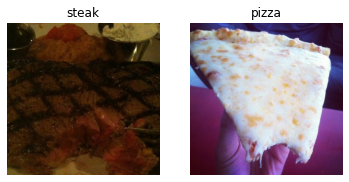

In [ ]:
# VISUALIZE DATA 
plt.figure()
plt.subplot(1,2,1)
steak_img = image_view('/content/pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = image_view('/content/pizza_steak/train/', 'pizza')

### pre-process the data

In [ ]:
# define directory dataset path
train_dir = '/content/pizza_steak/train/'
test_dir = '/content/pizza_steak/test/'



Turn our data into batches.
* a batch is small set of images or data, a model look at 32 images at one time.

* 10,000 of images might not fit into the memory of our processor

In [ ]:
# create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)



In [ ]:
# Load in our image data from directory and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            target_size=(224,224),
                                            class_mode='binary',
                                            batch_size = 32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size = (224,224),
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#get a sample of data
images, labels = train_data.next() # get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# HOW MANY BATHCES ARE THERE
len(train_data)

47

In [ ]:
#get the first 2 images
images[:2], images.shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

# 3.create a cnn model (baseline) a simple model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# create a model with baseline
model_4 = Sequential([
          Conv2D(filters=10, # filters is the number of sliding window going accross an input (higher = more complex model)
                 kernel_size = 3, # size of the sliding window going accross the input
                 strides=1, # the size of step taken by sliding window across an input
                 padding='valid', # if 'same', output shape same as input shape, if 'valid' output shape will compressed
                 activation='relu',
                 input_shape=(224,224,3)),
          Conv2D(10, 3, activation='relu'),
          Conv2D(10, 3, activation='relu'),
          Flatten(),
          Dense(1, activation='sigmoid') # this is a output layers(binary classification so only 1 nueron)

])

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_4 = model_4.fit(train_data,
                        epochs =5 ,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 191ms/step - loss: 1.4624 - accuracy: 0.6580 - val_loss: 0.4604 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4596 - accuracy: 0.7967 - val_loss: 0.4601 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3462 - accuracy: 0.8540 - val_loss: 0.3869 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.1974 - accuracy: 0.9300 - val_loss: 0.4495 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.0939 - accuracy: 0.9687 - val_loss: 0.6019 - val_accuracy: 0.7780


### 5. evaluating our models

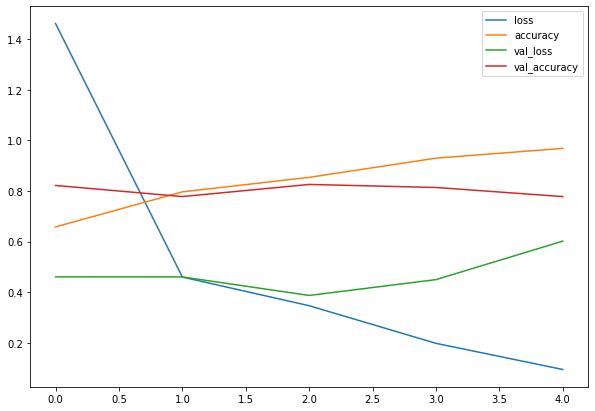

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7));

In [ ]:
def plot_loss_curves(history):

  """ return separate loss curves for trainning and validation metrics """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epoch = range(len(history.history['loss'])) # how many epochs we run for

  plt.plot(epoch, loss, label = 'trainning_loss')
  plt.plot(epoch, val_loss, label='valadition_loss')
  plt.title('loss')
  plt.xlabel('epoch')
  plt.legend()

  plt.figure()
  plt.plot(epoch, accuracy, label = 'accuracy')
  plt.plot(epoch, val_accuracy, label='valadition_acc')
  plt.title('accuracy')
  plt.xlabel('epoch')
  plt.legend()


Note: when models **Validation loss start to increase**, its likely that the model is **overfitting** the training dataset.
This means, its learning the patterns in the training dataset **to well** 

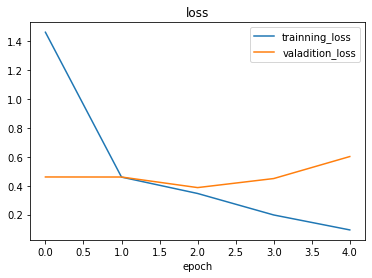

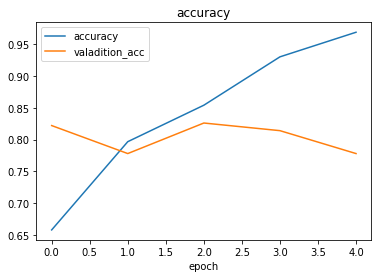

In [ ]:
plot_loss_curves(history_4)

**Note:**  ideally the two loss curves(training and validation) will be very similar to each other(training and validation loss decreasing at similar rates),when there are large difference your model may be **overfitting**

# 6. Adjusting the model parameters

Fitting a mcahine learning model come in 3 steps:

0. create a baseline model
1. bit the base line by overfitting a larger model
2. Reduce overfitting 

Ways to induce overfitting:
1. increase the numbers of conv layers
2. increase the number of conv filters
3. Add another dense layer to the output the flatten layer

ways to reduce overfitting:
1. Add Data Augmentation 
2. Add regularization layers (such as maxpool2d)
3. Add more data and so on...

In [ ]:
#create a model (this is going to be a new basline )

model_5 = Sequential([
          Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
          MaxPool2D(pool_size=2),
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(),
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(),
          Flatten(),
          Dense(1, activation='sigmoid')
])

In [ ]:
#compile the model
tf.random.set_seed(42)
model_5.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 187ms/step - loss: 0.6277 - accuracy: 0.6540 - val_loss: 0.4615 - val_accuracy: 0.7760
Epoch 2/10
47/47 [==============================] - 8s 180ms/step - loss: 0.4739 - accuracy: 0.7820 - val_loss: 0.3946 - val_accuracy: 0.8260
Epoch 3/10
47/47 [==============================] - 8s 178ms/step - loss: 0.4289 - accuracy: 0.8040 - val_loss: 0.4303 - val_accuracy: 0.7940
Epoch 4/10
47/47 [==============================] - 8s 178ms/step - loss: 0.4017 - accuracy: 0.8300 - val_loss: 0.3450 - val_accuracy: 0.8620
Epoch 5/10
47/47 [==============================] - 8s 180ms/step - loss: 0.3915 - accuracy: 0.8273 - val_loss: 0.3821 - val_accuracy: 0.8280
Epoch 6/10
47/47 [==============================] - 8s 179ms/step - loss: 0.3607 - accuracy: 0.8520 - val_loss: 0.3157 - val_accuracy: 0.8680
Epoch 7/10
47/47 [==============================] - 8s 178ms/step - loss: 0.3374 - accuracy: 0.8580 - val_loss: 0.3677 - val_accuracy: 0.8260
Epoch 

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

In [ ]:
 model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


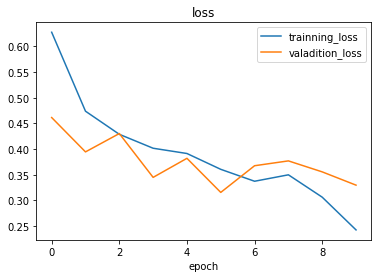

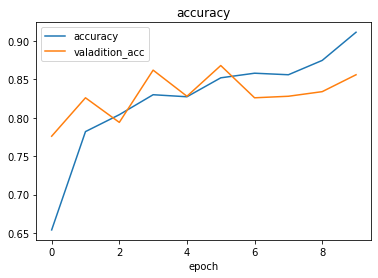

In [ ]:
plot_loss_curves(history_5)

### Adding Data Augmentation

In [ ]:
# create ImageDataGenerator training instance with data augmentation
train_datagen_augme = ImageDataGenerator(rescale=1/255.,
                                         rotation_range = 0.2,
                                         shear_range=0.2,
                                         zoom_range = 0.2,
                                         width_shift_range = 0.2,
                                         height_shift_range=0.2,
                                         horizontal_flip=True)

# create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#create ImageDatagenerator without for test data set
test_datagen = ImageDataGenerator(rescale=1/255.)

** Question ** what is data augmentation?

data Augmentation is the process altering our training data,
leading it to have more diversity and in turn allowing our model learn more generalizable patterns. Alterning might means adjusting the rotation of an image, flipping, croping, and so on

In [ ]:
# import data and augment it from training directory
print("Augmentation training data")

train_data_augmen = train_datagen_augme.flow_from_directory(train_dir,
                                                            target_size = (224,224),
                                                            batch_size = 32,
                                                            class_mode = 'binary',
                                                            shuffle= False) # demonstration perpose only

# create non_augme
print("non_data_augmented ")
train_data = train_datagen.flow_from_directory(train_dir,
                                                     target_size = (224,224),
                                                     batch_size = 32,
                                                     class_mode='binary',
                                                     shuffle=False)


# create non_augme test_data
print("non_test_data_augmented ")
img_size = (224,224)
test_data = test_datagen.flow_from_directory(test_dir,
                                                     target_size=img_size,
                                                     batch_size = 32,
                                                     class_mode='binary',
                                                     shuffle=False)

Augmentation training data
Found 1500 images belonging to 2 classes.
non_data_augmented 
Found 1500 images belonging to 2 classes.
non_test_data_augmented 
Found 500 images belonging to 2 classes.


**Note** Data Augmentation is usually only performed on training data, using ImageDataGenarator, build in data augmentation parameters our images are left as they are in the directory but they are modefied as they're loaded into the model...and training time will increase

Lookin same image at different perspective's

In [ ]:
images, labels = train_data.next()

aug_images, labels = train_data_augmen.next()

Text(0.5, 1.0, 'augmented image')

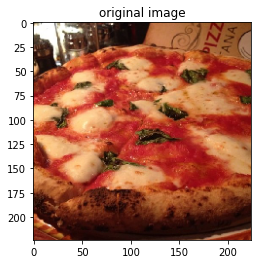

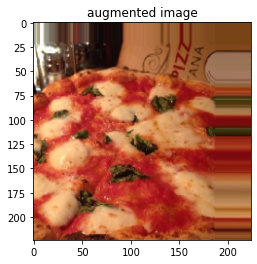

In [ ]:
# show image
import random

random_number = random.randint(0,31)
plt.imshow(images[random_number])
plt.title("original image")

plt.figure()
plt.imshow(aug_images[random_number])
plt.title("augmented image")

In [ ]:
#create a model with data augmentation

#create a model (this is going to be a new basline )

model_6 = Sequential([
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(pool_size=2),
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(),
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(),
          Flatten(),
          Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_6 = model_6.fit(train_data_augmen,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmen),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 457ms/step - loss: 0.7218 - accuracy: 0.4487 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 21s 444ms/step - loss: 0.6902 - accuracy: 0.5400 - val_loss: 0.6738 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 21s 447ms/step - loss: 0.6680 - accuracy: 0.6800 - val_loss: 0.6541 - val_accuracy: 0.5380
Epoch 4/5
47/47 [==============================] - 21s 447ms/step - loss: 0.6902 - accuracy: 0.5420 - val_loss: 0.6002 - val_accuracy: 0.7200
Epoch 5/5
47/47 [==============================] - 21s 444ms/step - loss: 0.5967 - accuracy: 0.6913 - val_loss: 0.4888 - val_accuracy: 0.8320


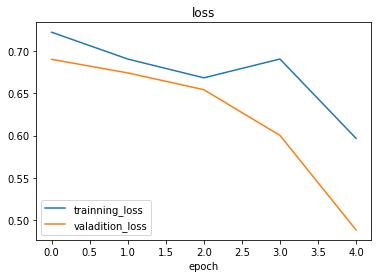

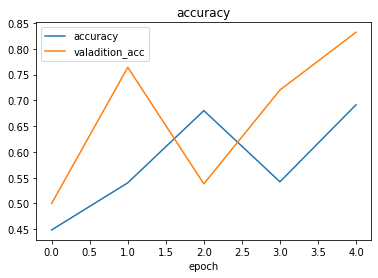

In [ ]:
plot_loss_curves(history_6)

create a model with **shuffle  = True** on ImageDataGenerator

In [ ]:
# import data and augment it from training directory
print("Augmentation training data")

train_data_augmen_shuff = train_datagen_augme.flow_from_directory(train_dir,
                                                            target_size = (224,224),
                                                            batch_size = 32,
                                                            class_mode = 'binary',
                                                            shuffle= True) # demonstration perpose only

Augmentation training data
Found 1500 images belonging to 2 classes.


In [ ]:
# create a model with shuffle data augmentation

model_7 = Sequential([
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(pool_size=2),
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(),
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(),
          Flatten(),
          Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_7 = model_7.fit(train_data_augmen_shuff,
                        epochs = 15,
                        steps_per_epoch = len(train_data_augmen_shuff),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 24s 468ms/step - loss: 0.6461 - accuracy: 0.6393 - val_loss: 0.5272 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 22s 466ms/step - loss: 0.5488 - accuracy: 0.7133 - val_loss: 0.4159 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5077 - accuracy: 0.7600 - val_loss: 0.4376 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 22s 470ms/step - loss: 0.5045 - accuracy: 0.7473 - val_loss: 0.3588 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 22s 473ms/step - loss: 0.4852 - accuracy: 0.7680 - val_loss: 0.3718 - val_accuracy: 0.8520


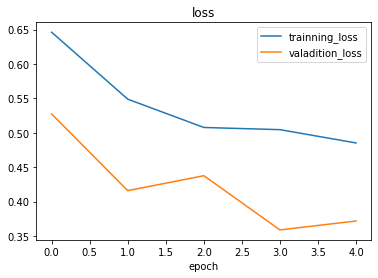

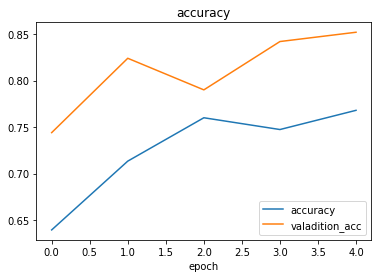

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_8 = Sequential([
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(pool_size=2),
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(),
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(),
          Flatten(),
          Dense(1, activation='sigmoid')
])

model_8.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_8 = model_8.fit(train_data_augmen_shuff,
                        epochs = 15,
                        steps_per_epoch = len(train_data_augmen_shuff),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/15
47/47 [==============================] - 23s 484ms/step - loss: 0.6811 - accuracy: 0.5507 - val_loss: 0.5869 - val_accuracy: 0.7260
Epoch 2/15
47/47 [==============================] - 22s 471ms/step - loss: 0.5791 - accuracy: 0.6907 - val_loss: 0.4097 - val_accuracy: 0.8160
Epoch 3/15
47/47 [==============================] - 22s 473ms/step - loss: 0.5055 - accuracy: 0.7707 - val_loss: 0.3627 - val_accuracy: 0.8480
Epoch 4/15
47/47 [==============================] - 22s 468ms/step - loss: 0.4933 - accuracy: 0.7800 - val_loss: 0.3448 - val_accuracy: 0.8700
Epoch 5/15
47/47 [==============================] - 22s 469ms/step - loss: 0.4520 - accuracy: 0.7947 - val_loss: 0.3264 - val_accuracy: 0.8540
Epoch 6/15
47/47 [==============================] - 22s 470ms/step - loss: 0.4577 - accuracy: 0.7953 - val_loss: 0.3230 - val_accuracy: 0.8520
Epoch 7/15
47/47 [==============================] - 23s 486ms/step - loss: 0.4433 - accuracy: 0.7987 - val_loss: 0.3432 - val_accuracy: 0.8620

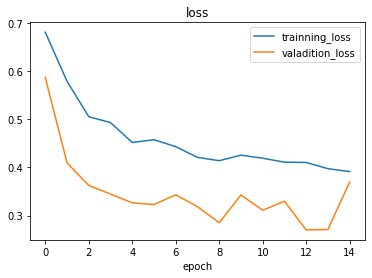

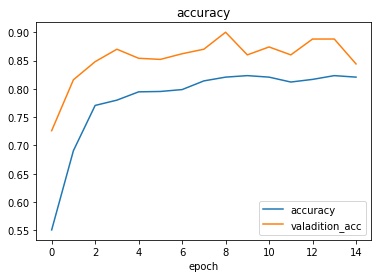

In [ ]:
plot_loss_curves(history_8)

### when shuffling training data, the model get to exposed to all kind of classes of data during training time, thus enables to learn feature accross a wide array of images
In our case (pizza and steak at the same time instead of just pizza and than steak)

### 7. repeat until satisfied

since we've already beaten our baseline, there are a few things we could try to contiue to improve our model.

1. increase the number of model layers(conv2d, maxpool2d layers)
2. increase the number of filters in each cnn layers(eg. 10 to 32 or 64)
3. train for longer
4. find a ideal learning rate
5. get more data
6. use  **transfer learning**.


### Make a prediction with our own custom data

In [ ]:
#class name
class_name

array(['pizza', 'steak'], dtype='<U9')

--2021-06-27 05:50:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-06-27 05:50:45 (32.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



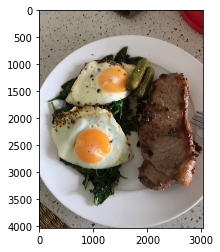

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("/content/03-steak.jpeg")

plt.imshow(steak)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
# steak

In [ ]:
# model_7.predict(steak)

### when we train a neural network and want to predict with own data, its import that the data is preprocess same as the format as the data your model was trained on

In [ ]:
# create a function to import and resize the image
def pre_data(filename, image_size=224):
  
  # read the image
  img = tf.io.read_file(filename)

  # decode the image into tensor
  img = tf.image.decode_image(img)

  # resize the image
  img = tf.image.resize(img, size = [image_size, image_size])

  # normalized the image
  img = img/255.

  return img


In [ ]:
steak = pre_data('/content/03-steak.jpeg')

In [ ]:
pred_7 = model_7.predict(tf.expand_dims(steak, axis = 0))

In [ ]:
pred_7

array([[0.89614844]], dtype=float32)

In [ ]:
class_name

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
pred_class = class_name[int(tf.round(pred_7))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_name = class_name):
  
  img = pre_data(filename)

  pred = model.predict(tf.expand_dims(img, axis = 0))

  pred_class = class_name[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"prediction:{pred_class}")
  plt.axis(False);

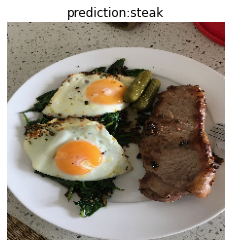

In [ ]:
pred_and_plot(model_8, '/content/03-steak.jpeg')

In [ ]:
!wget = https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.facebook.com%2FDominos%2F&psig=AOvVaw0QR-hn-OWihW_uNbAV8D-3&ust=1624859966380000&source=images&cd=vfe&ved=0CAoQjRxqFwoTCOiGtZ2Rt_ECFQAAAAAdAAAAABAJ

--2021-06-27 06:00:09--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-06-27 06:00:10--  https://www.google.com/url?sa=i
Resolving www.google.com (www.google.com)... 173.194.202.106, 173.194.202.99, 173.194.202.104, ...
Connecting to www.google.com (www.google.com)|173.194.202.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘url?sa=i’

url?sa=i                [ <=>                ]   1.38K  --.-KB/s    in 0s      

2021-06-27 06:00:10 (21.0 MB/s) - ‘url?sa=i’ saved [1414]

FINISHED --2021-06-27 06:00:10--
Total wall clock time: 0.08s
Downloaded: 1 files, 1.4K in 0s (21.0 MB/s)


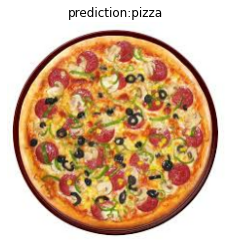

In [ ]:
pizza = mpimg.imread('/content/03-pizza-dad.jpeg')

pred_and_plot(model_8, '/content/piz.jpg')